# a. Handle Categorical Variables

In [13]:
import pandas as pd

# Sample data
data = {
    'Region': ['North', 'South', 'East', 'West'],
    'Property_Age': [5, 10, 3, 15],
    'Area_Type': ['Built-up', 'Carpet', 'Built-up', 'Carpet'],
    'Area_SqFt': [1200, 1500, 1100, 1600],
    'Rate_SqFt': [3000, 3500, 2500, 4000],
    'Floor_No': [2, 3, 1, 4],
    'Bedroom': [2, 3, 2, 4],
    'price_lakh': [50, 65, 40, 80]
}

df = pd.DataFrame(data)

# One-Hot Encoding for categorical columns like 'Region' and 'Area_Type'
df = pd.get_dummies(df, columns=['Region', 'Area_Type'], drop_first=True)

# Now df has only numerical values for modeling
print(df)


   Property_Age  Area_SqFt  Rate_SqFt  Floor_No  Bedroom  price_lakh  \
0             5       1200       3000         2        2          50   
1            10       1500       3500         3        3          65   
2             3       1100       2500         1        2          40   
3            15       1600       4000         4        4          80   

   Region_North  Region_South  Region_West  Area_Type_Carpet  
0          True         False        False             False  
1         False          True        False              True  
2         False         False        False             False  
3         False         False         True              True  


## b. Split the Data into Features and Target Variable

In [14]:
# Features (X) and target variable (y)
X = df.drop('price_lakh', axis=1)  # Drop the target variable
y = df['price_lakh']  # Target variable


## c. Split the Data into Training and Testing Sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2. Train the Model

In [16]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 3. Make Predictions
After training the model, you can predict the price_lakh for the test data.


In [17]:
# Predict the price on the test data
predictions = model.predict(X_test)

# Print predictions
print("Predictions: ", predictions)


Predictions:  [69.99414755]


## 4. Evaluate the Model
Evaluate the model performance using metrics like R² score, Mean Absolute Error (MAE), or Mean Squared Error (MSE).

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 4.99414755224808
Mean Squared Error: 24.94150977362549
R² Score: nan


C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## 5. Visualize the Predictions
You can plot the actual vs predicted values to visualize the performance of the model.

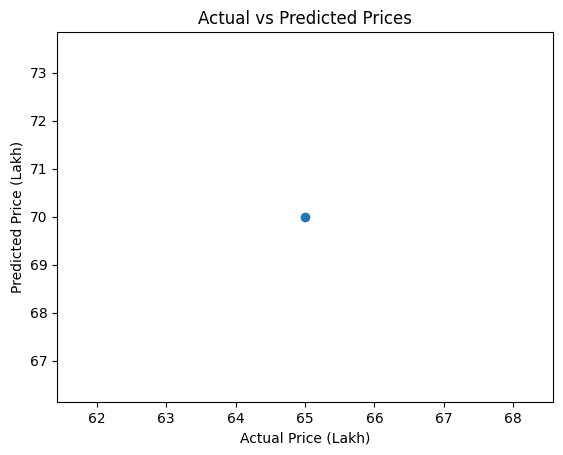

In [19]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Price (Lakh)')
plt.ylabel('Predicted Price (Lakh)')
plt.title('Actual vs Predicted Prices')
plt.show()


## 6. Final Model Predictions for New Data
To predict new data (e.g., if you get new property details), use the trained model.

In [21]:
import pandas as pd
import numpy as np

# New data for prediction
new_data = pd.DataFrame({
    'Property_Age': [5],
    'Area_SqFt': [1500],
    'Rate_SqFt': [3200],
    'Floor_No': [3],
    'Bedroom': [3],
    'Region_South': [1],  # Assuming Region_South is present in the new data
    'Area_Type_Carpet': [1]  # Assuming Area_Type_Carpet is present in the new data
})

# Ensure that new data has the same columns as the training data
# In this case, the training data had columns 'Region_North' and 'Region_West' which should also be in the new data
# Initialize the columns (add missing columns as 0)
for col in X.columns:
    if col not in new_data.columns:
        new_data[col] = 0

# Reorder the columns in the same order as the training data
new_data = new_data[X.columns]

# Predict the price
new_prediction = model.predict(new_data)
print(f"Predicted Price (Lakh): {new_prediction}")


Predicted Price (Lakh): [66.9844021]
